<a href="https://www.princetonalumniangels.org/" target = "_blank"><img src="paa_logo.png" width="240" height="240" align="right"/></a>

<a id = 'top'></a>
# Princeton Alumni Angels Startup Pipeline Data Analysis 2018 - Summer 2021

This is a simple data analysis using Python in a Jupyter Notebook of all the startups that have applied to Princeton Alumni Angels before summer of 2021. The goal of this analysis is to get a rough understanding of where PAA is standing in terms of its goal to invest in world class startups that have diverse leadership.

There is a particular focus on commenting about the diversity of the teams of startups that have applied to PAA.

We hope this data analysis provides a good benchmark for PAA in the future when even more startups have applied. Datasets are currently kept private to Princeton Alumni Angels, but that may change in the future. If you have any suggestions on how to improve our code/visuals or have anything you want us to add or explore, let us know as well!

Leon Chen '23 (leonchen@princeton.edu), Asher Joy '23 (asherj@princeton.edu)

**At the top of the page, there is a toggle labeled "hide code". If you would like to hide the code that we used to produce the graphs, just hit that button.**

## Summary <a id = "summary"></a>

**1)** Applications to PAA have grown in number every year since forming in 2018, even through 2020. 2021 numbers will be calculated after applications close this year.

[Link to Visuals and Code](#applications)

**2)** The majority of startups (72.861%) that have applied to PAA have a Princeton connection. PAA seems to be making full use of its network.

[Link to Visuals and Code](#connection)

**3)** Startups that have applied to PAA are very diverse in the industry that they serve. Healthcare, and FinTech are industries that stick out, but this may be the case due to PAA's pitch cycle focuses.

[Link to Visuals and Code](#industry)

**4)** The majority of startups (72.5%) that have applied to PAA since 2020 have at least one male on their founding team.

In addition, almost half of all startups (42.5%) that have applied to PAA since 2020 have **at least one female** on their founding team. We compared this statistic to the broader gender statistic in the startup landscape. It seems that PAA attracts more startups with diverse teams in terms of gender, but it's still too early to tell.

PAA should still work towards encouraging more startups with diverse founding teams (and teams in general) to apply.

[Link To Visuals and Code](#gender)

**5)** The majority of startups (67.68%) that have applied to PAA since 2020 have at least one member on their founding team that identifies as White. This is followed closely by Asian. 

On the other hand, a minority of startups have at least one member on their founding team that identifies as Black, Hispanic/Latinx, or other races/ethnicities.

In terms of race/ethnicity, PAA can definitely do better in encouraging more diverse startups to apply.

[Link To Visuals and Code](#race)

**6)** There are some startups (9.16%) that have applied to PAA since 2020 that have at least one founding member that has served in active duty.

[Link to Visuals and Code](#serve)

**7)** New York and California are the most popular headquarters locations for startups that have applied to PAA. This is most likely due to the fact that PAA is based in these two states, so networking and marketing is easier. Perhaps PAA should think about where to market better to get the maximum outreach possible (e.g. Chicago).

[Link to Visuals and Code](#headquarters)

## Important stuff needed to code

In [147]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import matplotlib.ticker as mtick
import panel as pn
from IPython.display import IFrame

In [148]:
all_data = pd.read_csv("PAA_Data - Jupyter.csv")
#portfolio_data = pd.read_csv("PAA_Investor_Company_Data - Jupyter.csv")
#all_data.head()

In [149]:
#Make these column names a little bit more legible
all_data.rename(columns={"Industry Served (organized)": "Industry", "Amount Already Closed of the Total Currently Raising":
                        "Already Closed", "[Gender] Does anyone on your founding team identify as:" : "Gender",
                        "[Race/Ethnicity] Does anyone on your founding team identify as:": "Race/Ethnicity", 
                        "Has anyone on your founding team ever served on active duty?": "Active Duty", "Princeton Connection? (Binary)" :
                       "Princeton Connection"},
                        inplace = True)

In [150]:
#Replace nans
all_data["Gender"] = all_data["Gender"].fillna("")
all_data["Race/Ethnicity"] = all_data["Race/Ethnicity"].fillna("")
all_data["Active Duty"] = all_data["Active Duty"].fillna("")
all_data["State Headquartered"] = all_data["State Headquartered"].fillna("")

In [151]:
#The pitch application groups important categories together if there are multiple
#founders/co-founders. Let's clean the groups up into lists.
genders_list = []
for i in range(len(all_data["Gender"])): 
    genders = all_data["Gender"].iloc[i]
    genders = genders.split(',')
    # for each gender in the list, strip white spaces and add to new array
    array = []
    for ge in genders:
        ge = ge.strip()
        array.append(ge)
    genders_list.append(array) 
# replace "gender" column with cleaned list
all_data["Gender"] = genders_list

#Now for race/ethnicity
re_list = []
for i in range(len(all_data["Race/Ethnicity"])): 
    re = all_data["Race/Ethnicity"].iloc[i]
    re = re.split(',')
    array = []
    for r in re:
        r = r.strip()
        array.append(r)
    re_list.append(array) 
all_data["Race/Ethnicity"] = re_list

In [152]:
def binary_first(data, year):
    left, right = 0, len(data) - 1
    result = -1
    
    while left <= right:
        mid = (left + right) // 2
        if year == data[mid]:
            result = mid
            right = mid - 1
        elif year < data[mid]:
            right = mid - 1
        else:
            left = mid + 1
    return result

def binary_last(data, year):
    left, right = 0, len(data) - 1
    result = -1

    while left <= right:
        mid = (left + right) // 2
        if year == data[mid]:
            result = mid
            left = mid + 1
        elif year < data[mid]:
            right = mid - 1
        else:
            left = mid + 1
    return result


first, last = binary_first(all_data["Pitch Year"], 2018), binary_last(all_data["Pitch Year"], 2018)
data = [all_data.iloc[first : last + 1]]
data_2018 = pd.concat(data, axis = 1)

first, last = binary_first(all_data["Pitch Year"], 2019), binary_last(all_data["Pitch Year"], 2019)
data = [all_data.iloc[first : last + 1]]
data_2019 = pd.concat(data, axis = 1)

first, last = binary_first(all_data["Pitch Year"], 2020), binary_last(all_data["Pitch Year"], 2020)
data = [all_data.iloc[first : last + 1]]
data_2020 = pd.concat(data, axis = 1)

# first = binary_first(all_data["Pitch Year"], 2021)
# data = [all_data.iloc[first :]]
# data_2021 = pd.concat(data, axis = 1)

In [153]:
#all_data.head()

In [154]:
princeton_orange = "#f58025"

def counter1(copy):
    values = copy.values
    c = Counter()
    for vals in values:
        c[vals] += 1
    return c

def counter2(copy):
    values = copy.values
    c = Counter()
    for vals in values:
        for x in vals:
            c[x] += 1
    return c

def sort(vals, cat):
    vals1 = []
    cats1 = []
    sorted_in = np.argsort(vals)
    for i in range(len(sorted_in)):
        vals1.append(vals[sorted_in[i]])
        cats1.append(cat[sorted_in[i]])
    return cats1, vals1

## Applications have grown in number every year since PAA was formed <a id='applications'></a>

Let's take a look at the number of applications PAA has received throughout the years and see if the group is expanding its network of startups.

We leave out the current year 2021 since there are still pitch cycles coming up.

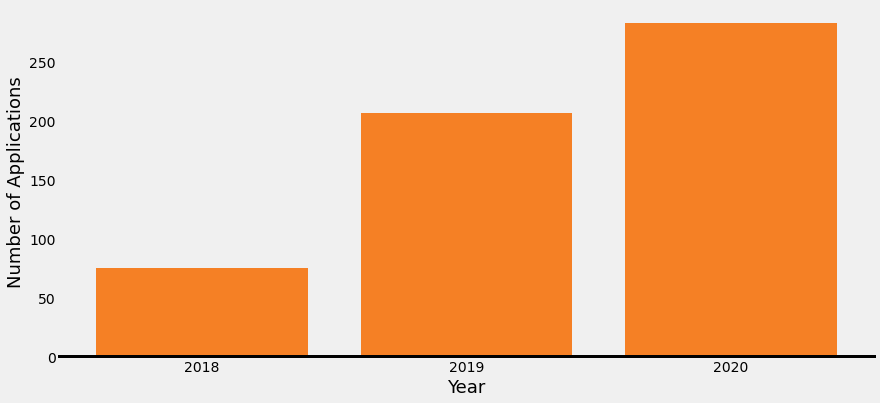

Percent change from 2018 to 2019:  176.000%
Percent change from 2019 to 2020:  36.715%


In [155]:
c = counter1(all_data["Pitch Year"])

#delete 2021
del c[2021]

years = []
counts = []
for i in c:
    years.append(str(i))
    counts.append(c[i])

fig_all, ax = plt.subplots(1, 1, figsize = (13, 6))

ax.bar(years, counts, color = "#f58025")
ax.set_xlabel('Year', fontsize = 18)
ax.set_ylabel('Number of Applications', fontsize = 18)
ax.spines["bottom"].set_color("black")
ax.grid(False)

plt.show()

percent18_19 = (c[2019] - c[2018])/c[2018]
percent19_20 = (c[2020] - c[2019])/c[2019]

print("Percent change from 2018 to 2019: ", '{:.3%}'.format(percent18_19))
print("Percent change from 2019 to 2020: ", '{:.3%}'.format(percent19_20))

The explosive growth from 2018 to 2019 (176% !!!) can most likely be attributed to the fact that applications in 2018 only opened up late summer, resulting in fewer application numbers for the entire year and thus a huge percent increase when comparing 2019 application numbers.

2020 seemed to still be a solid application year even facing the pandemic, with a 36.715% increase in applications from 2019.

2021 numbers will be calculated after applications close for this year.

[Go Back to Summary](#summary)

<a id = "connection"></a>
## The majority of startups that have applied to PAA have a Princeton connection

PAA encourages Princeton connected startups to apply and invest in them. Let's calculate the statistic:

In [156]:
#since it's binary, it's easier to use a count function

def connection_percent(data):
    connection_count, noconnection_count = 0, 0

    connection_count = data.str.count("Yes").sum()
    noconnection_count = data.str.count("No").sum()

    percent_connection = connection_count/(connection_count + noconnection_count)
    percent_none = 1 - percent_connection

    categories = ["No", "Yes"]
    data = [100*percent_none, 100*percent_connection]
    
    return percent_connection, categories, data

percent_connection_all, categories_all, connection_all = connection_percent(all_data["Princeton Connection"])
percent_connection_2018, categories_2018, connection_2018 = connection_percent(data_2018["Princeton Connection"])
percent_connection_2019, categories_2019, connection_2019 = connection_percent(data_2019["Princeton Connection"])
percent_connection_2020, categories_2020, connection_2020 = connection_percent(data_2020["Princeton Connection"])
#percent_connection_2021, categories_2021, connection_2021 = connection_percent(data_2021["Princeton Connection"])


def ax_connection_function():
    ax.set_xlabel('Percent', fontsize = 18)
    ax.set_ylabel('Princeton Connection?', fontsize = 18)
    ax.spines["bottom"].set_color("black")
    ax.grid(False)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    
fig1, ax = plt.subplots(1, 1, figsize = (13, 6))
ax.barh(categories_all, connection_all, color = princeton_orange)
ax_connection_function()
plt.close(fig1)
mpl_pane1 = pn.pane.Matplotlib(fig1, dpi=144, tight = True)

fig2, ax = plt.subplots(1, 1, figsize = (13, 6))
ax.barh(categories_2018, connection_2018, color = princeton_orange)
ax_connection_function()
plt.close(fig2)
mpl_pane2 = pn.pane.Matplotlib(fig2, dpi=144, tight = True)

fig3, ax = plt.subplots(1, 1, figsize = (13, 6))
ax.barh(categories_2019, connection_2019, color = princeton_orange)
ax_connection_function()
plt.close(fig3)
mpl_pane3 = pn.pane.Matplotlib(fig3, dpi=144, tight = True)

fig4, ax = plt.subplots(1, 1, figsize = (13, 6))
ax.barh(categories_2020, connection_2020, color = princeton_orange)
ax_connection_function()
plt.close(fig4)
mpl_pane4 = pn.pane.Matplotlib(fig4, dpi=144, tight = True)

# fig5, ax = plt.subplots(1, 1, figsize = (13, 6))
# ax.barh(categories_2021, connection_2021, color = princeton_orange)
# ax_connection_function()
# plt.close(fig5)
# mpl_pane5 = pn.pane.Matplotlib(fig5, dpi=144, tight = True)

tabs = pn.Tabs(("All", mpl_pane1), ("2018", mpl_pane2), 
               ("2019", mpl_pane3), ("2020", mpl_pane4))
              #("2021", mpl_pane5))

tabs.save("tabs1.html")
IFrame(src='tabs1.html', width=970, height=500)

In [157]:
print("All: Percent of startups with a Princeton connection: ", '{:.3%}'.format(percent_connection_all))
print("2018: Percent of startups with a Princeton connection: ", '{:.3%}'.format(percent_connection_2018))
print("2019: Percent of startups with a Princeton connection: ", '{:.3%}'.format(percent_connection_2019))
print("2020: Percent of startups with a Princeton connection: ", '{:.3%}'.format(percent_connection_2020))
#print("2021: Percent of startups with a Princeton connection: ", '{:.3%}'.format(percent_connection_2021))

All: Percent of startups with a Princeton connection:  72.861%
2018: Percent of startups with a Princeton connection:  89.333%
2019: Percent of startups with a Princeton connection:  84.058%
2020: Percent of startups with a Princeton connection:  73.145%


**72.861%** of startups that have applied to PAA have a Princeton connection. Looks like PAA is doing a great job utilizing its network in encouranging Princeton connection startups to apply!

[Go Back to Summary](#summary)

<a id = industry></a>
## Startups that have applied to PAA are generally varied in industry served, but sector-focused marketing seems apparent (due to pitch cycles)

Startups that have applied to PAA indicate what type of industry they serve. It's worthy to note that PAA has different focuses for each pitch cycle, and these focuses may show up on our visuals/counts (e.g. Healthcare focused pitch cycle).

The graph below shows the **10 most common industries** startups that have applied to PAA are involved in:

In [158]:
c1 = counter1(all_data["Industry"])
c2 = counter1(data_2018["Industry"])
c3 = counter1(data_2019["Industry"])
c4 = counter1(data_2020["Industry"])
#c5 = counter1(data_2021["Industry"])

def add_counter(counter):
    cats = []
    vals = []
    for i in counter:
        cats.append(i)
        vals.append(counter[i])
    return cats, vals

categories_industry1, vals_industry1 = add_counter(c1)
categories_industry2, vals_industry2 = add_counter(c2)
categories_industry3, vals_industry3 = add_counter(c3)
categories_industry4, vals_industry4 = add_counter(c4)
#categories_industry5, vals_industry5 = add_counter(c5)

categories_industry_all, vals_industry_all = sort(vals_industry1, categories_industry1)
categories_industry_2018, vals_industry_2018 = sort(vals_industry2, categories_industry2)
categories_industry_2019, vals_industry_2019 = sort(vals_industry3, categories_industry3)
categories_industry_2020, vals_industry_2020 = sort(vals_industry4, categories_industry4)
#categories_industry_2021, vals_industry_2021 = sort(vals_industry5, categories_industry5)

def ax_industry_function(cats, vals):
    ax.barh(cats[len(cats) - 10:], 
            vals[len(vals) - 10:], color = princeton_orange)
    ax.set_xlabel('Count', fontsize = 18)
    ax.set_ylabel('Industry', fontsize = 18)
    ax.spines["bottom"].set_color("black")
    ax.grid(False)
    
fig1, ax = plt.subplots(1, 1, figsize = (13, 8))
ax_industry_function(categories_industry_all, vals_industry_all)
plt.close(fig1)
mpl_pane1 = pn.pane.Matplotlib(fig1, tight = True)

fig2, ax = plt.subplots(1, 1, figsize = (13, 8))
ax_industry_function(categories_industry_2018, vals_industry_2018)
plt.close(fig2)
mpl_pane2 = pn.pane.Matplotlib(fig2, tight = True)

fig3, ax = plt.subplots(1, 1, figsize = (13, 8))
ax_industry_function(categories_industry_2019, vals_industry_2019)
plt.close(fig3)
mpl_pane3 = pn.pane.Matplotlib(fig3, tight = True)

fig4, ax = plt.subplots(1, 1, figsize = (13, 8))
ax_industry_function(categories_industry_2020, vals_industry_2020)
plt.close(fig4)
mpl_pane4 = pn.pane.Matplotlib(fig4, tight = True)

# fig5, ax = plt.subplots(1, 1, figsize = (13, 8))
# ax_industry_function(categories_industry_2021, vals_industry_2021)
# plt.close(fig5)
# mpl_pane5 = pn.pane.Matplotlib(fig5, tight = True)

tabs = pn.Tabs(("All", mpl_pane1), ("2018", mpl_pane2), 
               ("2019", mpl_pane3), ("2020", mpl_pane4))
              #("2021", mpl_pane5))
tabs.save("tabs2.html")
IFrame(src='tabs2.html', width=955, height=635)

Notice that there is a particular focus for startups to be involved in the Healthcare Technologies industry, although this may reflect PAA's recent healthcare-focused pitch cycle. FinTech follows behind, and it's worthy to note that many startups that apply to PAA still indicate "Other" for their industry.

[Go Back to Summary](#summary)

<a id='gender'></a>
## Since 2020, the majority of startups that have applied to PAA indicate that someone on their founding team identifies as male (e.g. founder, co-founder)

At the beginning of 2020, the application form that startups had to fill out in order to apply to PAA started inncluding the following question in relation to gender and sexuality: **"Does anyone on your founding team identify as (select all that apply):**.

Options included Male, Female, Gay, Non-Binary/Third Gender, Prefer not to say, and a "fill in your blank" answer (which peculiarly, all the groups that chose this option answered "Human being").

The graphs below show **(1)** the number of startups that have at least one team member that identifies as the respective categories and **(2)** the percentage of startups that have at least one team member that identifies as the respective categories.

Note that startups can have multiple founders - this is why the percentages don't add up to $100$% (for the pie charts). They should be read as **X% of startups have at least one founding team member that indentifies as '''category'''**.

In [159]:
#Check when gender data first appears in dataframe - since we know this never
#appears in 2018-2019, just check for the first instance it appears
first_gender=0
for i in range(len(all_data["Gender"])):
  if all('' == value for value in all_data["Gender"].iloc[i]):
    pass
  else:  
    first_gender = i
    break

copy = all_data["Gender"].iloc[first_gender:].copy()
#Next, there might be white space (e.g. no response) even when the
#gender section was active. Let's rename this to "Prefer Not to Say".
for i in range(len(copy)):
  if '' in copy.iloc[i]:
    copy.iloc[i] = ["Prefer Not to Say"]

c = counter2(copy)

categories_gender = []
vals_gender = []
for i in c:
    categories_gender.append(i)
    vals_gender.append(c[i])

categories_gender1, vals_gender1 = sort(vals_gender, categories_gender)


#Let's do percentages now!
percentages_gender = []
pie_categories = []

for i in range(len(vals_gender1)):
  blank = []
  blank1 = []
  percent = vals_gender1[i] / (len(all_data["Gender"]) - first_gender)
  blank.append(percent)
  blank.append(1 - percent)
  blank1.append( categories_gender1[i] + "\n  "+ str(round(percent * 100, 1)) + "%")
  blank1.append("")
  percentages_gender.append(blank)
  pie_categories.append(blank1)

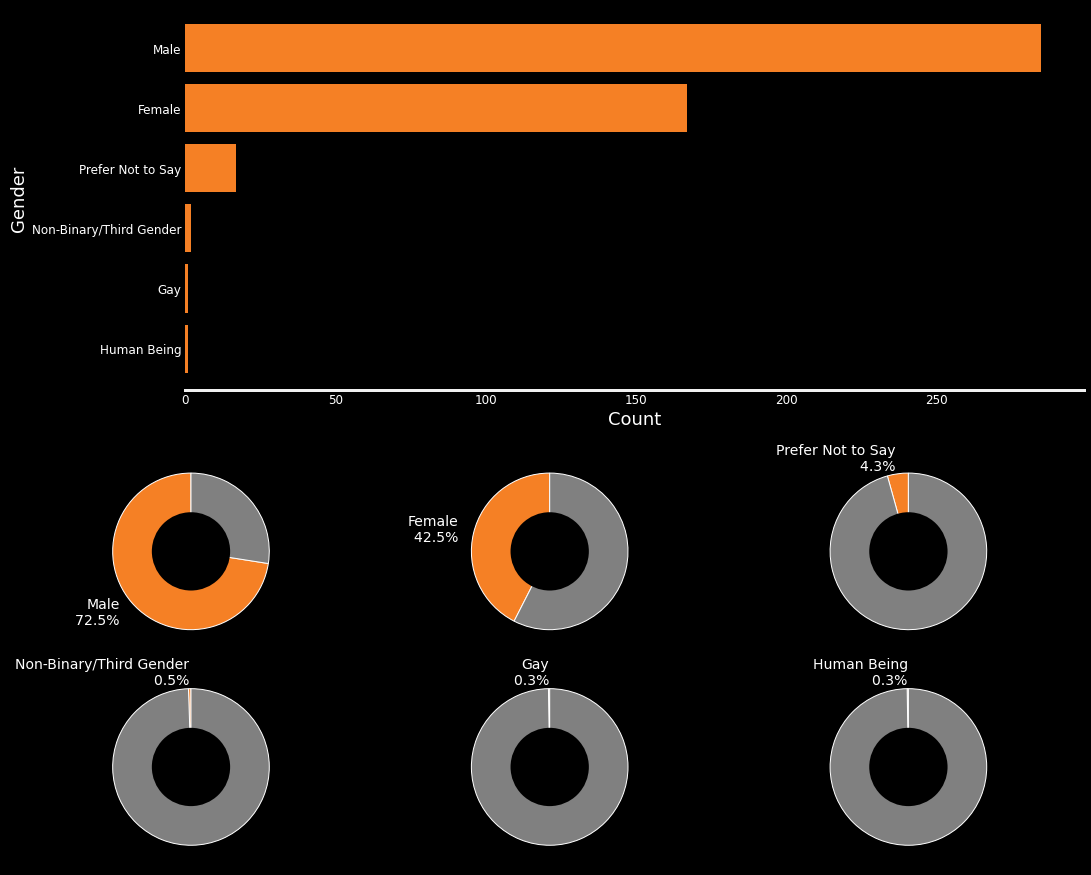

In [160]:
fig = plt.figure(constrained_layout=True, figsize=(15, 12))
fig.patch.set_facecolor("black")

subfigs = fig.subfigures(2, 1, wspace=0.07)
subfigs[0].set_facecolor("black")
ax1 = subfigs[0].subplots(1, 1)
ax1.set_facecolor("black")
ax1.barh(categories_gender1,vals_gender1, color = princeton_orange)
ax1.set_xlabel('Count', fontsize = 18, color = "white")
ax1.set_ylabel('Gender', fontsize = 18, color = "white")
ax1.tick_params(axis = "both", colors = "white", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax1.grid(False)


subfigs[1].set_facecolor("black")
ax2 = subfigs[1].subplots(2, 3)
ax2 = ax2.ravel()

j = 5
colors = [princeton_orange, "grey"]

data = {}
for i in range(6):
  data['circle%d' % i] = i

for i in range(6):
  patches, texts = ax2[i].pie(percentages_gender[j], labels = pie_categories[j], colors = colors, 
             startangle = 90, textprops={'size': 'medium'}, wedgeprops={'edgecolor' : 'white', 
            'linewidth' : '1.0'}, labeldistance = 1.2)
  
  data[i] = plt.Circle((0, 0), 0.5, fc = 'black')
  ax2[i].add_patch(data[i])

  for i, patch in enumerate(patches):
    texts[i].set_color("white")

  #axs[i].axis('equal')
  j-=1

plt.show()

Hmm...the majority of startups that have applied to PAA since 2020 indicate that there is at least one male on their founding team. Perhaps this doesn't tell the whole picture. What we should probably focus on more is comparing the amount/precentage of startups that have at least one female on their founding team to the amount/percentage that have **no female** on their founding team. 

The Silicon Valley Bank (SVB) is a bank that assists in funding startups. In 2020, they released their Startup Outlook Report that includes statistics regarding a diverse range of topics including gender. They demonstrated through their surveys that **only 32% of startups had at least one (1) female founder**.$^{2}$

Here's their graphic that includes the founder gender statistic at the bottom:

<img src="svb.png" alt="Drawing" style="width: 800px;"/>

We actually already have this statistic! Our code calculates the number of startups that indicate at least one female on the founding team as well as the percentage of startups. Just for good measure, let's calculate again and compare/graph:

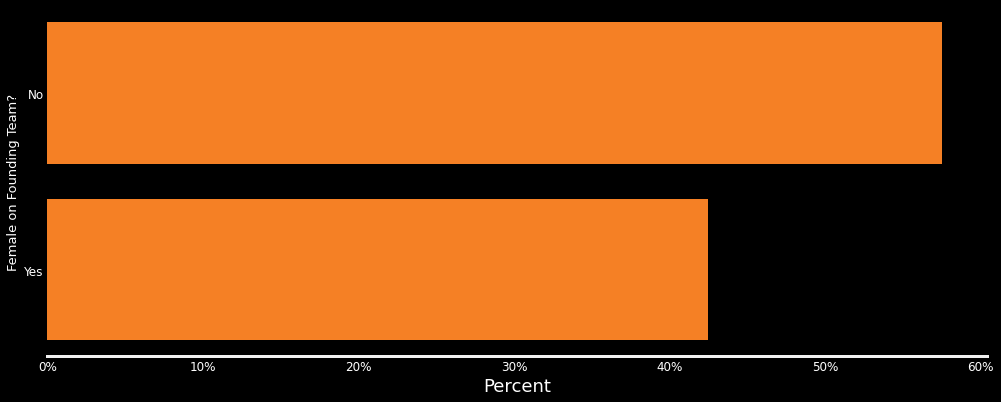

Percent startups with at least one female founding member:  42.494%
Percent startups with no female founding member:  57.506%


In [161]:
count = 0
for i in range(len(copy)):
    if "Female" in copy.iloc[i]:
        count += 1

onefemale_percent = count / len(copy)
nofemale_percent = 1 - onefemale_percent

categories = ["Yes", "No"]
data = [100*onefemale_percent, 100*nofemale_percent]

fig, ax = plt.subplots(1, 1, figsize = (15, 6))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

ax.barh(categories, data, color = princeton_orange)
ax.set_xlabel('Percent', fontsize = 18, color = "white")
ax.set_ylabel('Female on Founding Team?', fontsize = 13, color = "white")
ax.tick_params(axis = "both", colors = "white", labelsize = 12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()
print("Percent startups with at least one female founding member: ", '{:.3%}'.format(onefemale_percent))
print("Percent startups with no female founding member: ", '{:.3%}'.format(nofemale_percent))

These percentages are pretty close! The calculated percentage of startups applied to PAA with at least one female founding member also matches the percentage we calculated above!

The calculated percentage of startups that have applied to PAA that have at least one female member on their founding team is **42.494%**, which is higher than the **32%** of startups that have at least one female founder according to SVB. Does this mean that PAA is good at promoting and encouraging startups with more diverse teams to apply?

It's worth reiterating that this data was **only introduced at the beginning of 2020**. One year of data is not enough to determine whether or not PAA successfully encourages startups with female founders to apply, even if the application pipeline shows this statistic to be higher than the overall market distribution of startups that have at least one female founder. 

We hope that starting the analysis now will serve as a benchmark for PAA (and potentially other angel groups!) to determine if the group is advocating enough for diverse leadership.

[Go Back to Summary](#summary)

<a id="race"></a>
## Since 2020, the majority of startups that have applied to PAA indicate that someone on their founding team identifies as White (e.g. founder, co-founder)

At the beginning of 2020, another question was introduced to the application in regards to race/ethnicity: **"Does anyone on your founding team identify as (select all that apply):**.

The question had a range of possible selections including White, Asian, African-American/Black, Hispanic/Latinx and other answers, including one to specify one not listed.

The graphs below show **(1)** the number of startups that have at least one team member that identifies as the respective categories and **(2)** the percentage of startups that have at least one team member that identifies as the respective categories.

Note that startups can have multiple founders - this is why the percentages don't add up to $100$% (for the pie charts). They should be read as **X% of startups have at least one founding team member that indentifies as '''category'''**.

In [162]:
#Now for Race/Ethnicity
first_re = first_gender

copy = all_data["Race/Ethnicity"].iloc[first_re:].copy()

#Once again, there could be white space!
for i in range(len(copy)):
  if '' in copy.iloc[i]:
    copy.iloc[i] = ["No Response"]


#looks like there were some startups that specified even further
#for ethnicity (e.g. Japanese). Let's simplify so we get
#relevant numbers and percentages
for i in range(len(copy)):
    j = 0
    for string in copy.iloc[i]:
        if "Asian" in string:
            if j > 0:
                copy.iloc[i].remove(string)
            else:   
                index = copy.iloc[i].index(string)
                copy.iloc[i][index] = "Asian"
                j += 1
        elif "Japanese" in string:
            if j > 0:
                copy.iloc[i].remove(string)
            else:   
                index = copy.iloc[i].index(string)
                copy.iloc[i][index] = "Asian"
                j += 1

c = counter2(copy)
        
#Let's see the counter and the most common; since there are a lot of choices
#as evident from the excel file, it may be smart to group into an "other" category

#We can see that there are a LOT of small numbers here: let's choose the value of
#20 to threshold (we can see that there are many below 20)

for i in c:
  if c[i] < 20:
    c["Other"] += c[i]

categories_re = []
vals_re = []
for i in c:
  if c[i] >= 20:
    categories_re.append(i)
    vals_re.append(c[i])

categories_re1, vals_re1 = sort(vals_re, categories_re)

#now for percentages!

percentages_re = []
pie_re = []

for i in range(len(vals_re1)):
  blank = []
  blank1 = []
  percent = vals_re1[i] / len(copy)
  blank.append(percent)
  blank.append(1 - percent)
  blank1.append( categories_re1[i] + "\n  "+ str(round(percent * 100, 2)) + "%")
  blank1.append("")
  percentages_re.append(blank)
  pie_re.append(blank1)

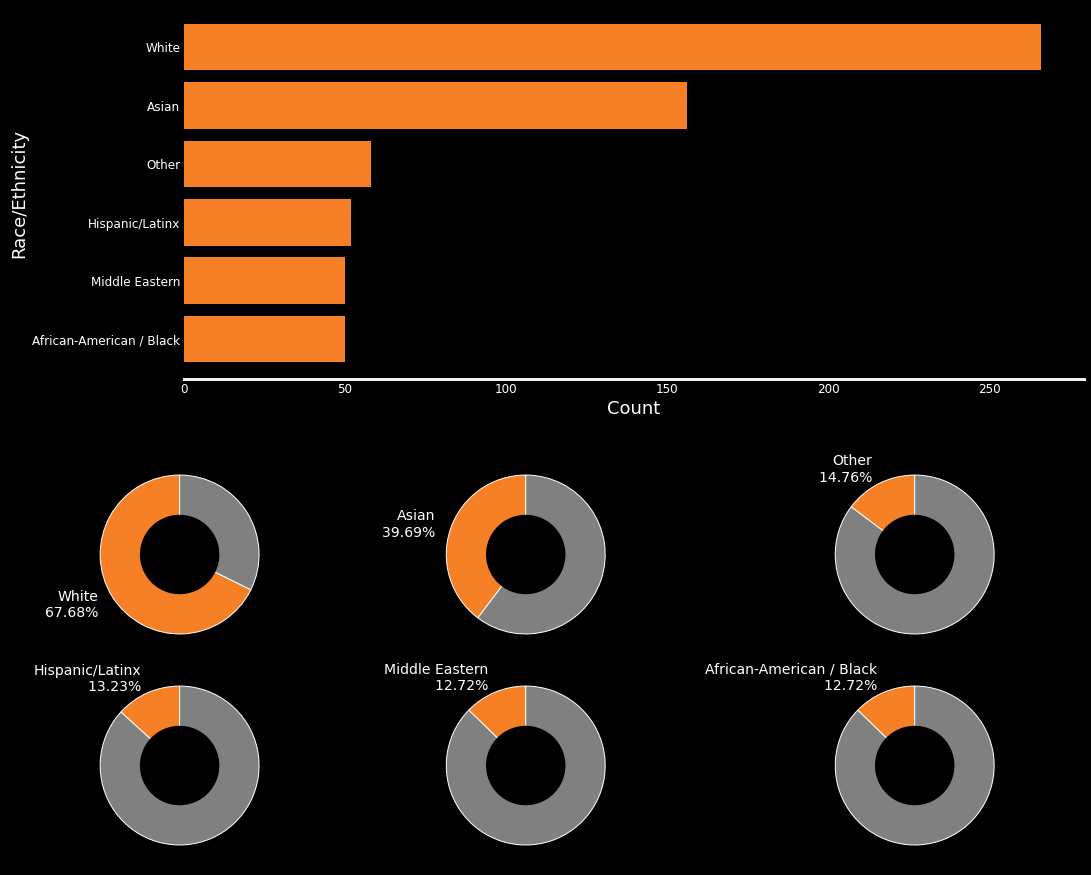

In [163]:
fig = plt.figure(constrained_layout=True, figsize = (15, 12))
fig.patch.set_facecolor("black")

subfigs = fig.subfigures(2, 1, hspace = 0.07)
subfigs[0].set_facecolor("black")

ax2 = subfigs[0].subplots(1, 1)
ax2.set_facecolor("black")
ax2.barh(categories_re1,vals_re1, color = princeton_orange)
ax2.set_xlabel('Count', fontsize = 18, color = "white")
ax2.set_ylabel('Race/Ethnicity', fontsize = 18, color= "white")
ax2.tick_params(axis = "both", labelsize = 12, colors = "white")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.grid(False)


subfigs[1].set_facecolor("black")
axs = subfigs[1].subplots(2, 3)
axs = axs.ravel()

j = 5
colors = [princeton_orange, "grey"]

data = {}
for i in range(len(categories_re1)):
  data['circle%d' % i] = i

for i in range(len(categories_re1)):
  patches, texts = axs[i].pie(percentages_re[j], labels = pie_re[j], colors = colors, 
             startangle = 90, textprops={'size': 'medium'}, wedgeprops={'edgecolor' : 'white', 
            'linewidth' : '1.0'}, labeldistance = 1.2)
  
  data[i] = plt.Circle((0, 0), 0.5, fc = 'black')
  axs[i].add_patch(data[i])

  for i, patch in enumerate(patches):
    texts[i].set_color("white")

  #axs[i].axis('equal')
  j-=1

plt.show()

It's not entirely unexpected that a majority of startups that have applied to PAA have someone on their founding team that identifies as White. It also isn't unexpected that the percentage of startups that have someone on their founding team that identifies as Asian follows closely at second.

The Kauffman Fellows Program reports that White and Asian executives in startups are drastically over-represented compared to the working-age US population, while Latinx and Black executives are drastically under-represented.$^{3}$

Here's their graphic:

![](kauffman.png)

It's extremely worth mentioning that the same Kauffman study also found that although more diverse teams generally have more limited access to capital, when these teams are able to get funding, **they raise more capital during all rounds of funding** and **have higher future returns**.$^{4}$

Here are their graphics:

<img src="kauffman2.png" alt="Drawing" style="width: 600px;"/>

<img src="kauffman3.png" alt="Drawing" style="width: 600px;"/>

PAA already indicates on their website that the group aspires to invest in companies with diverse leadership. Perhaps, PAA should also **actively encourage** these types of startups to apply even more given these statistics!

We hope this analysis will serve as a benchmark for the future, especially given the data that diverse founding teams raise more money and generate higher returns in the future.

[Go Back to Summary](#summary)

<a id = "serve"></a>
## Since 2020, there have been a few startups that have applied to PAA where at least one member on their founding team has served on active duty

At the beginning of 2020, another question was introduced to the application in regards to active duty: **Has anyone on your founding team ever served on active duty?**.

Let's calculate the statistic below:

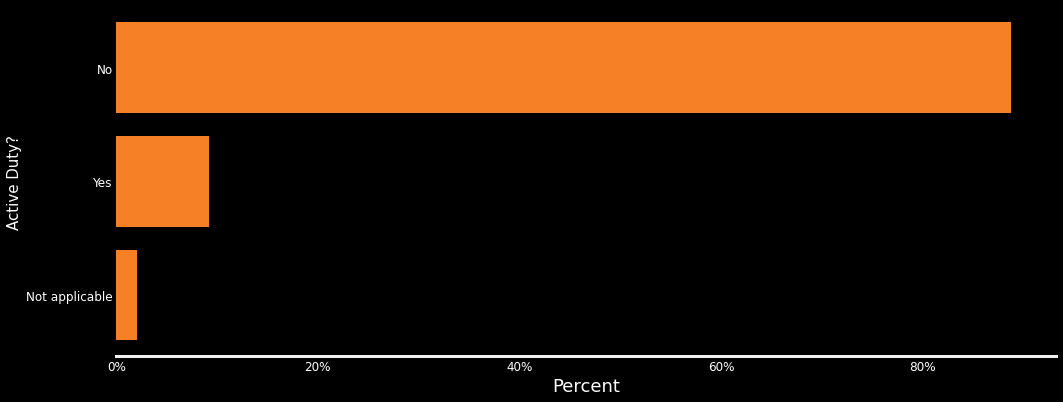

Percent startups with no founding member that has served: 88.804%
Percent startups with at least one member that has served: 9.160%
Percent startups indicated not applicable: 2.036%


In [164]:
first_active = first_re

copy = all_data["Active Duty"].iloc[first_active:].copy()

for i in range(len(copy)):
  if copy.iloc[i] == "":
    copy.iloc[i] = "Not applicable"

c = counter1(copy)
    
categories_duty = []
vals_duty = []
for i in c:
    categories_duty.append(i)
    vals_duty.append(c[i])

categories_duty1, vals_duty1 = sort(vals_duty, categories_duty)

percentages = []
for i in range(len(vals_duty1)):
    percentages.append(100*vals_duty1[i]/np.sum(vals_duty1))

fig, ax = plt.subplots(1, 1, figsize = (15, 6))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

ax.barh(categories_duty1, percentages, color = princeton_orange)
ax.set_xlabel('Percent', fontsize = 18, color = "white")
ax.set_ylabel("Active Duty?", fontsize = 15, color = "white")
ax.tick_params(axis = "both", colors = "white", labelsize = 12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()
print("Percent startups with no founding member that has served:", '{:.3%}'.format(percentages[2]/100))
print("Percent startups with at least one member that has served:", '{:.3%}'.format(percentages[1]/100))
print("Percent startups indicated not applicable:", '{:.3%}'.format(percentages[0]/100))  

Looks like **9.16%** of startups that have applied to PAA since 2020 have at least one founding member that has served in active duty.

[Go Back to Summary](#summary)

<a id="headquarters"></a>
## Startups that have applied to PAA often headquarter on the coasts, specifically in New York and California

Startups that apply to PAA indicate where they are registered and located. Let's calculate some basic statistics on where startups are located. We have omitted registration location since it doesn't give us relevant information, as headquarter location is more telling. If you're curious, Delaware is the most common registration location for startups that have applied to PAA (and basically the startup industry as a whole) because of its favorable corporation laws.

The graphs below show the **most common headquarter locations** for startups that have applied to PAA:

In [165]:
#States headquartered
copy = all_data["State Headquartered"].copy()
c = counter1(copy)

categories_sh = []
vals_sh = []
for i in c:
  if c[i] > 10 and i != "":
    categories_sh.append(i)
    vals_sh.append(c[i])

categories_sh1, vals_sh1 = sort(vals_sh, categories_sh)

#now for percentages
percentages_sh = []
pie_sh = []
sum = 0

for i in range(len(vals_sh1)):
  percent = vals_sh1[i] / len(copy)
  sum += percent
  percentages_sh.append(percent)
  pie_sh.append(categories_sh1[i])

percentages_sh.append(1 - sum)
pie_sh.append("Other")

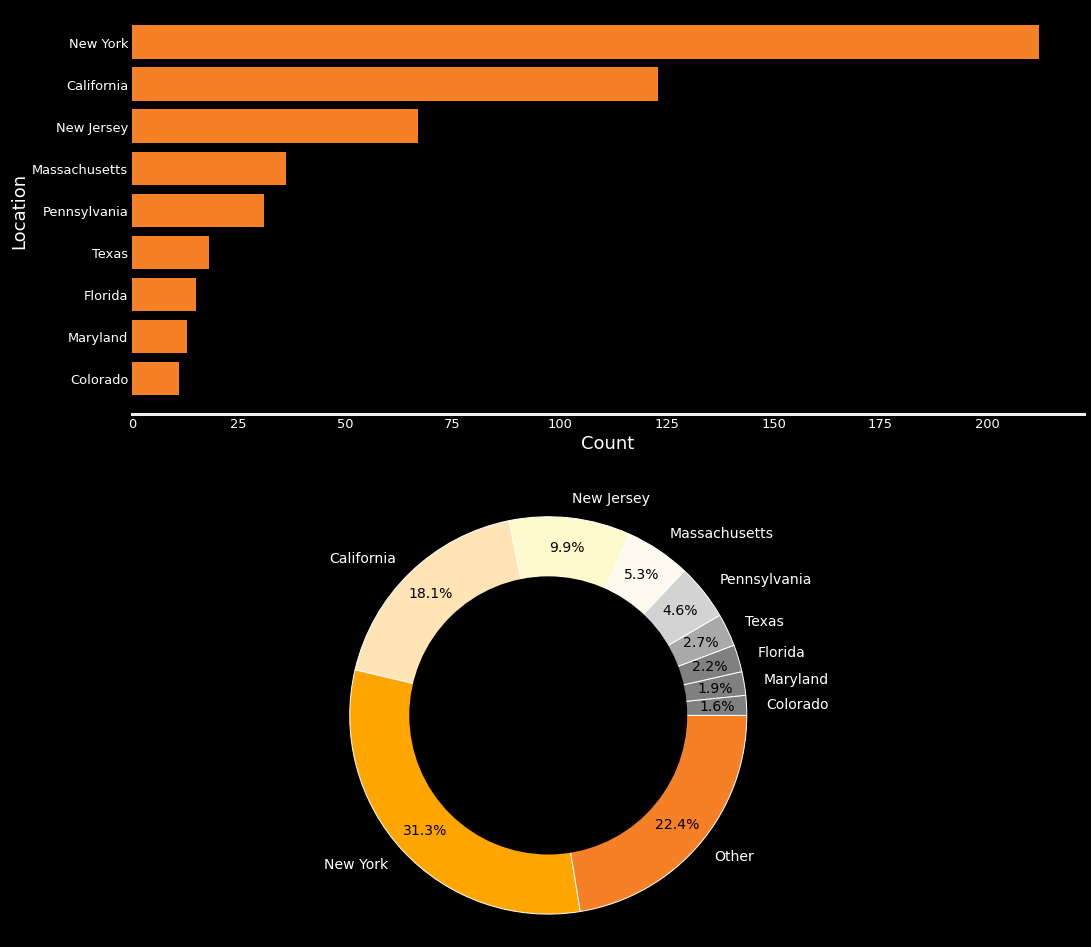

In [166]:
fig = plt.figure(constrained_layout = True, figsize = (15, 13))
fig.patch.set_facecolor("black")

subfigs = fig.subfigures(2, 1, hspace = 0.07)
subfigs[0].set_facecolor("black")

ax = subfigs[0].subplots(1, 1)
ax.set_facecolor("black")
ax.barh(categories_sh1,vals_sh1, color = princeton_orange)
ax.set_xlabel('Count', fontsize = 18, color = "white")
ax.set_ylabel('Location', fontsize = 18, color= "white")
ax.tick_params(axis = "both", labelsize = 13, colors = "white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)


subfigs[1].set_facecolor("black")
axs = subfigs[1].subplots(1, 1)

colors = ["grey","grey","grey", "darkgrey", "lightgrey", "floralwhite", "lemonchiffon", "moccasin",
          "orange", princeton_orange]
#explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, .05]   
patches, texts, pct = axs.pie(percentages_sh, labels = pie_sh, colors = colors, 
            textprops={'size': 'medium'}, wedgeprops={'edgecolor' : 'white', 
            'linewidth' : '1.0'}, autopct = '%1.1f%%', pctdistance = 0.85)#, explode = explode)

for i, patch in enumerate(patches):
  texts[i].set_color('white')
data = plt.Circle((0, 0), 0.7, fc = 'black')
axs.add_patch(data)
axs.axis('equal')


plt.show()

The most common startup headquarter amongst those that have applied to PAA is **New York**, followed closely by **California**. This isn't entirely surprising especially considering PAA has chapters based primarily in these two states, so marketing is done more efficiently in these areas.

Below is an interactive map with all the startups that have applied to PAA. Clicking on each circle will allow the action of scrolling through all the startups that have applied from that location. There have been startups headquartered internationally, but including them in the map would have expanded the scope of the visual too much. In the future, it may be worth including these international startups once numbers increase.

**There may be some locations that have duplicate startups - we left them in because PAA allows applications for different cycles, and startups may have had time to grow and change.**

In [167]:
%%html
<iframe title="" aria-label="Map" id="datawrapper-chart-BDaMr" src="https://datawrapper.dwcdn.net/BDaMr/7/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="549"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(e){if(void 0!==e.data["datawrapper-height"]){var t=document.querySelectorAll("iframe");for(var a in e.data["datawrapper-height"])for(var r=0;r<t.length;r++){if(t[r].contentWindow===e.source)t[r].style.height=e.data["datawrapper-height"][a]+"px"}}}))}();
</script>

[Go Back to Summary](#summary)

Thank you for taking the time to read this data analysis report. This is the first time that PAA has analyzed its startup pipeline and is something that the group believes to be extremely beneficial for the organization as a whole.

If you have any suggestions on how to improve this data analysis, please let us know. We hope to continue this project over the next few years.

## References and sources

$^{1}$ <a href="https://www.investopedia.com/articles/personal-finance/102015/series-b-c-funding-what-it-all-means-and-how-it-works.asp" target="_blank">https://www.investopedia.com/articles/personal-finance/102015/series-b-c-funding-what-it-all-means-and-how-it-works.asp</a>

$^{2}$ <a href="https://www.svb.com/globalassets/library/uploadedfiles/content/trends_and_insights/reports/startup_outlook_report/suo_global_report_2020-final.pdf" target="_blank">https://www.svb.com/globalassets/library/uploadedfiles/content/trends_and_insights/reports/startup_outlook_report/suo_global_report_2020-final.pdf</a>

$^{3}$ <a href="https://www.kauffmanfellows.org/journal_posts/the-pipeline-myth-ethnicity-fund-managers" target="_blank">https://www.kauffmanfellows.org/journal_posts/the-pipeline-myth-ethnicity-fund-managers</a>

$^{4}$ <a href="https://www.kauffmanfellows.org/journal_posts/the-pipeline-myth-ethnicity-fund-managers" target="_blank">https://www.kauffmanfellows.org/journal_posts/the-pipeline-myth-ethnicity-fund-managers</a>

[Go Back to Top of Page](#top)